In [1]:
#importing libraries
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv(r'train.csv', names = ['age', 'job', 'marital', 'education',
                                                                            'default', 'balance', 'housing', 'loan', 'contact', 
                                                                            'day', 'month', 'duration', 'campaign', 'pdays',
                                                                            'previous', 'poutcome', 'y'])
#train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,41,services,married,secondary,no,0,yes,no,unknown,5,may,114,2,-1,0,unknown,no
1,48,blue-collar,single,secondary,no,312,yes,yes,cellular,3,feb,369,2,-1,0,unknown,no
2,55,technician,married,secondary,no,1938,no,yes,cellular,18,aug,193,1,386,3,success,yes
3,54,admin.,married,tertiary,no,59,yes,no,cellular,10,jul,268,1,-1,0,unknown,no
4,34,management,single,tertiary,no,2646,no,no,cellular,14,apr,142,1,-1,0,unknown,yes


In [3]:
#to find the median of the attribute/column
def threshold(df, col):
    l = len(df.iloc[:,col])
    if l%2 == 0:
        median = (train_df.iloc[l//2,col] + train_df.iloc[l//2-1,col])/2 
    else:
        median = train_df.iloc[l//2,0]
    return median

In [4]:
#column with numerical values: age, balance, day, duration, campaign, pdays, previous
#corresponding column numbers: 0, 5, 9, 11, 12, 13, 14
age_threshold = threshold(train_df, 0)
balance_threshold = threshold(train_df, 5)
day_threshold = threshold(train_df, 9)
duration_threshold = threshold(train_df, 11)
campaign_threshold = threshold(train_df, 12)
pdays_threshold = threshold(train_df, 13)
previous_threshold = threshold(train_df, 14)

In [5]:
#converting numerical values into binary categories
#if value>threshold, then 1, else 0
def convert(df, col, threshold):
    for i in range(len(df.iloc[:,col])):
        if df.iloc[i,col]>threshold:
            df.iloc[i,col] = 1
        else:
            df.iloc[i,col] = 0


In [6]:
#converting train dataset
convert(train_df, 0, age_threshold)
convert(train_df, 5, balance_threshold)
convert(train_df, 9, day_threshold)
convert(train_df, 11, duration_threshold)
convert(train_df, 12, campaign_threshold)
convert(train_df, 13, pdays_threshold)
convert(train_df, 14, previous_threshold)


In [7]:
print("Converting numerical values in TRAIN DATA into binary categories")
#train_df.head()

Converting numerical values in TRAIN DATA into binary categories


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,services,married,secondary,no,0,yes,no,unknown,0,may,0,0,0,0,unknown,no
1,1,blue-collar,single,secondary,no,0,yes,yes,cellular,0,feb,1,0,0,0,unknown,no
2,1,technician,married,secondary,no,1,no,yes,cellular,0,aug,1,0,1,1,success,yes
3,1,admin.,married,tertiary,no,0,yes,no,cellular,0,jul,1,0,0,0,unknown,no
4,0,management,single,tertiary,no,1,no,no,cellular,0,apr,0,0,0,0,unknown,yes


In [8]:
#loading test datset
test_df = pd.read_csv(r'test.csv', names = ['age', 'job', 'marital', 'education',
                                                                            'default', 'balance', 'housing', 'loan', 'contact', 
                                                                            'day', 'month', 'duration', 'campaign', 'pdays',
                                                                            'previous', 'poutcome', 'y'])
#test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,41,management,single,secondary,no,764,no,no,cellular,12,jun,230,2,-1,0,unknown,no
1,39,blue-collar,married,secondary,no,49,yes,no,cellular,14,may,566,1,370,2,failure,no
2,60,retired,married,primary,no,0,no,no,telephone,30,jul,130,3,-1,0,unknown,no
3,31,entrepreneur,single,tertiary,no,247,yes,yes,unknown,2,jun,273,1,-1,0,unknown,no
4,26,student,single,unknown,no,2020,no,no,telephone,28,jan,42,3,-1,0,unknown,no


In [9]:
#converting test dataset
convert(test_df, 0, age_threshold)
convert(test_df, 5, balance_threshold)
convert(test_df, 9, day_threshold)
convert(test_df, 11, duration_threshold)
convert(test_df, 12, campaign_threshold)
convert(test_df, 13, pdays_threshold)
convert(test_df, 14, previous_threshold)

In [10]:
print("Converting numerical values in TEST DATA into binary categories")
#test_df.head()

Converting numerical values in TEST DATA into binary categories


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,management,single,secondary,no,1,no,no,cellular,0,jun,1,0,0,0,unknown,no
1,1,blue-collar,married,secondary,no,0,yes,no,cellular,0,may,1,0,1,1,failure,no
2,1,retired,married,primary,no,0,no,no,telephone,1,jul,0,1,0,0,unknown,no
3,0,entrepreneur,single,tertiary,no,0,yes,yes,unknown,0,jun,1,0,0,0,unknown,no
4,0,student,single,unknown,no,1,no,no,telephone,1,jan,0,1,0,0,unknown,no


In [11]:
#converting categorical string type target value into numerical target value
train_df["y"] = train_df["y"].replace(to_replace = "yes", value = 1)
train_df["y"] = train_df["y"].replace(to_replace = "no", value = 0)
x_train = train_df.iloc[:,:16]
y_train = train_df["y"]

In [12]:
test_df["y"] = test_df["y"].replace(to_replace = "yes", value = 1)
test_df["y"] = test_df["y"].replace(to_replace = "no", value = 0)
x_test = test_df.iloc[:,:16]
y_test = test_df["y"]

In [69]:
#DECISION TREE IMPLEMENTATION

header = ['age', 'job', 'marital', 'education','default', 'balance', 'housing', 'loan', 'contact', 
            'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome', 'y']

#finding the entropy of the the attribute
def entropy(df):
    entropy = 0
    counts = train_df.iloc[:,len(df.columns)-1].value_counts()
    p_count = counts[1]/len(df)
    n_count = counts[0]/len(df)
    entropy = entropy + (((-1)* p_count * np.log2(p_count)) + ((-1)* n_count * np.log2(n_count)))
    return entropy

#finding information gain
def info_gain(model, left, right, current_uncertainty):    
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - (p * model(left)) - ((1 - p) * model(right))

#finding the unique values an attribute can take
def unique_vals(df, col):
    return set(df.iloc[:,col])

#finding the count of the unique values of the label attribute
def label_counts(df):
    counts = df.iloc[:,len(df.columns)-1].value_counts()
    return counts.to_dict()

#defining a condition that is used to split the dataset
class Condition:
    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):# Compare the feature value in an example to the conidition
        val = example[self.column]
        return val == self.value

    def __repr__(self): #print the condition
        condition = "=="
        return "Is %s %s %s?" % (header[self.column], condition, str(self.value))
    
#split the dataset by checking each row and appending it to either a true set or false set
def partition(df, question):
    true_rows, false_rows = [], []
    for i in range(len(df)):
        row = df.iloc[i, :]
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    
    #converting the rows of list type into DataFrame type
    true_rows = pd.DataFrame(true_rows, columns = list(df.keys()))
    false_rows = pd.DataFrame(false_rows, columns = list(df.keys()))
    return true_rows, false_rows    

#Finding the feature or value of the feature that best splits the dataset
def find_best_split(model, rows):
    
    best_gain = 0  
    best_question = None  
    current_uncertainty = model(rows)
    n_features = len(rows.columns) - 1  

    for col in range(n_features):  
        values = unique_vals(rows, col)         

        for val in values: 

            question = Condition(col, val)

            # splitting the dataset into true and false categories
            true_rows, false_rows = partition(rows, question)
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculating the information gain for this split
            gain = info_gain(model, true_rows, false_rows, current_uncertainty)

            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

#defining the leaf node by setting it as the max value of all the values the attribute of a feature can take
class Leaf:
    def __init__(self, df):
        self.predictions = self.max_leaf(df)
        
    def max_leaf(self, df):
        res = label_counts(df)
        max_value = max(res, key = res.get)
        return {max_value:res[max_value]}
    
#defining the decision node that splits the node
class Decision_Node:
    def __init__(self, question, true_branch, false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch
        
#constructing the tree
def build_tree(model, rows):
    
    if len(rows.iloc[:,0])>0:
        #finding the attribute that best splits the datset and finding its information gain
        gain, question = find_best_split(model, rows)

        #leaf node case
        if gain == 0:
            return Leaf(rows)

        #partition the datset 
        true_rows, false_rows = partition(rows, question)

        # Recursively build the true branch.
        true_branch = build_tree(model, true_rows)

        # Recursively build the false branch.
        false_branch = build_tree(model, false_rows)

    #returning the decision node
    return Decision_Node(question, true_branch, false_branch)

#method to make prediction for test dataset
def classify(row, node):

    # leaf node case
    if isinstance(node, Leaf):
        return node.predictions

    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)  


In [70]:
#RANDOM FOREST IMPLEMENTATION
import random
class Random_Forest:
    
    def __init__(self,num_of_bagged = 5, num_of_features = 2):
        self.num_of_bagged = num_of_bagged
        self.num_of_features = num_of_features
        
    def fit(self,df):
        self.models=[]
        for i in range(self.num_of_bagged):
            subset_len = np.random.choice(int(len(df)/2))
            indexs=np.random.choice(len(df),size = subset_len)# generates random subset from the train dataset with replacement
            f_indexs = []
            idx = random.randint(0,15)
            for i in range(self.num_of_features):
                while idx in f_indexs:
                    idx = random.randint(0,15)
                f_indexs.append(idx)    
             
            f_indexs = np.append(f_indexs, 16) #random features along with target feature
            
            
            # Training for each sample bunch by Decision Tree Classifier
            tree = build_tree(entropy, df.iloc[indexs, f_indexs])
            
            # Storing the models
            self.models.append(tree)
            
    def predict(self,X):
        pred = np.zeros(len(X))
        for model in self.models:
            y_pred = []
            for i in range(len(X)):
                predicted = list(classify(X.iloc[i,:], model))
                y_pred.append(predicted[0])
            pred = pred + y_pred
        norm = self.num_of_bagged * np.ones(len(X))
        res = np.round(pred/norm) # normalisation
        return list(map(int, res))
    
    def acc(self,y_true,y_pred):
        return np.mean(y_true==y_pred)

In [73]:
train_acc_2 = []
test_acc_2 = []
train_acc_4 = []
test_acc_4 = []
train_acc_6 = []
test_acc_6 = []

for i in range(1, 500, 90):
    for j in [2, 4, 6]:
        print("Random Forest for iteration : ", i, "with feature subset equal to : ", j)
        rf_model = Random_Forest(i, j)
        rf_model.fit(train_df)
        print("---> making predictions")
        train_y_pred = rf_model.predict(x_train)
        test_y_pred = rf_model.predict(x_test)
        
        if j==2:
            train_acc_2.append(rf_model.acc(y_train, train_y_pred))
            test_acc_2.append(rf_model.acc(y_test, test_y_pred))
            
        elif j==4:
            train_acc_4.append(rf_model.acc(y_train, train_y_pred))
            test_acc_4.append(rf_model.acc(y_test, test_y_pred))
        
        elif j==6:
            train_acc_6.append(rf_model.acc(y_train, train_y_pred))
            test_acc_6.append(rf_model.acc(y_test, test_y_pred))
    

Random Forest for iteration :  1 with feature subset equal to :  2
---> making predictions
Random Forest for iteration :  1 with feature subset equal to :  4
---> making predictions
Random Forest for iteration :  1 with feature subset equal to :  6
---> making predictions
Random Forest for iteration :  91 with feature subset equal to :  2
---> making predictions
Random Forest for iteration :  91 with feature subset equal to :  4
---> making predictions
Random Forest for iteration :  91 with feature subset equal to :  6
---> making predictions
Random Forest for iteration :  181 with feature subset equal to :  2
---> making predictions
Random Forest for iteration :  181 with feature subset equal to :  4
---> making predictions
Random Forest for iteration :  181 with feature subset equal to :  6
---> making predictions
Random Forest for iteration :  271 with feature subset equal to :  2
---> making predictions
Random Forest for iteration :  271 with feature subset equal to :  4
---> makin

UnboundLocalError: local variable 'question' referenced before assignment

In [89]:
import matplotlib.pyplot as plt
x_axis = [i for i in range(1, 500, 90)]
y_axis_train2 = [1-i for i in train_acc_2]

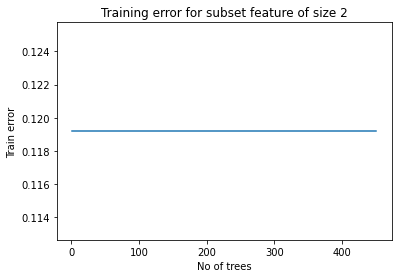

In [92]:
plt.plot(x_axis, y_axis_train2)
plt.xlabel("No of trees")
plt.ylabel("Train error")
plt.title("Training error for subset feature of size 2")
plt.show()

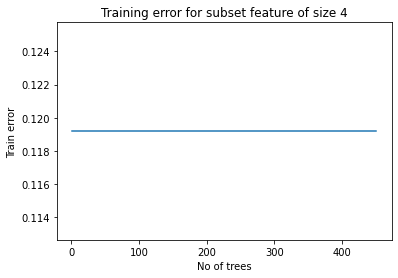

In [93]:
y_axis_train4 = [1-i for i in train_acc_4]
plt.plot(x_axis, y_axis_train4)
plt.xlabel("No of trees")
plt.ylabel("Train error")
plt.title("Training error for subset feature of size 4")
plt.show()

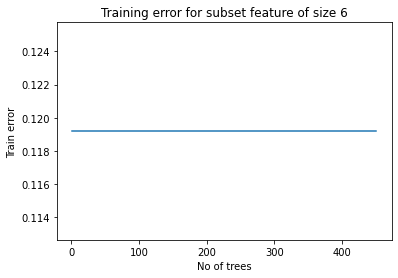

In [94]:
y_axis_train6 = [1-i for i in train_acc_6]
plt.plot(x_axis, y_axis_train6)
plt.xlabel("No of trees")
plt.ylabel("Train error")
plt.title("Training error for subset feature of size 6")
plt.show()

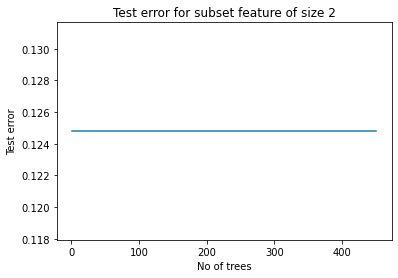

In [106]:
y_axis_test2 = [1-i for i in test_acc_2]
plt.plot(x_axis, y_axis_test2)
plt.xlabel("No of trees")
plt.ylabel("Test error")
plt.title("Test error for subset feature of size 2")
plt.show()

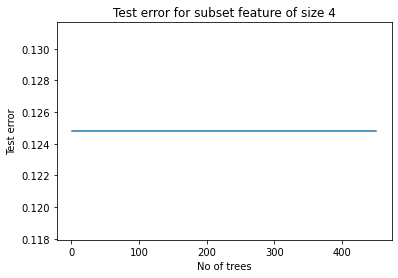

In [107]:
y_axis_test4 = [1-i for i in test_acc_4]
plt.plot(x_axis, y_axis_test4)
plt.xlabel("No of trees")
plt.ylabel("Test error")
plt.title("Test error for subset feature of size 4")
plt.show()

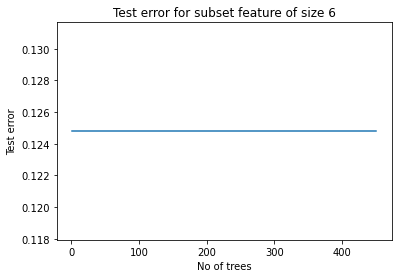

In [108]:
y_axis_test6 = [1-i for i in test_acc_6]
plt.plot(x_axis, y_axis_test6)
plt.xlabel("No of trees")
plt.ylabel("Test error")
plt.title("Test error for subset feature of size 6")
plt.show()